In [323]:
import numpy
import pandas
from n2lite import n2lite
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.facecolor'] = 'white'

In [324]:
beam1 = '3l'
beam2 = '2r'
beam3 = '5l'
beam = [beam1, beam2, beam3]
backend = ['power meter1', 'power meter 2', 'xffts']

fn_hot = '20181111_095244'
fn_cold = '20181111_094043'

path_hot = '/home/amigos/data/sql/sisv_sweep/' + fn_hot + '/param.db'
path_cold = '/home/amigos/data/sql/sisv_sweep/' + fn_cold + '/param.db'

In [325]:
_hot = n2lite.N2lite(path_hot)
_cold = n2lite.N2lite(path_cold)
hot = _hot.read_pandas_all()
cold = _cold.read_pandas_all()

In [326]:
# param

initial_voltage = 6.0
final_voltage = 9.0
step = 0.05
roop = int((final_voltage - initial_voltage) / step) + 1

In [327]:
bins = numpy.arange(initial_voltage - step, final_voltage + step, step)

def set_flag(x):
    if x < bins[0]:return-1
    for i in range(len(bins)-1):
        if x >= bins[i] and x < bins[i+1]:return i
        continue
    return len(bins)

In [328]:
# set_flag

hot['pm1_flag'] = hot['sis_vol_'+beam1].apply(set_flag)
hot['pm2_flag'] = hot['sis_vol_'+beam2].apply(set_flag)
hot['xffts_flag'] = hot['sis_vol_'+beam3].apply(set_flag)
cold['pm1_flag'] = cold['sis_vol_'+beam1].apply(set_flag)
cold['pm2_flag'] = cold['sis_vol_'+beam2].apply(set_flag)
cold['xffts_flag'] = cold['sis_vol_'+beam3].apply(set_flag)
hot = hot[hot['pm1_flag'] != -1][hot['pm2_flag'] != -1][hot['xffts_flag'] != -1]
cold = cold[cold['pm1_flag'] != -1][cold['pm2_flag'] != -1][cold['xffts_flag'] != -1]

/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [329]:
# groupby

hot1_groupby = hot.groupby('pm1_flag')
cold1_groupby = cold.groupby('pm1_flag')
hot1_mean = hot1_groupby.mean()
cold1_mean = cold1_groupby.mean()
hot2_groupby = hot.groupby('pm2_flag')
cold2_groupby = cold.groupby('pm2_flag')
hot2_mean = hot2_groupby.mean()
cold2_mean = cold2_groupby.mean()
hot3_groupby = hot.groupby('xffts_flag')
cold3_groupby = cold.groupby('xffts_flag')
hot3_mean = hot3_groupby.mean()
cold3_mean = cold3_groupby.mean()

In [330]:
# plot param

vol1_hot = hot1_mean['sis_vol_{}'.format(beam1)]
vol2_hot = hot2_mean['sis_vol_{}'.format(beam2)]
vol3_hot = hot3_mean['sis_vol_{}'.format(beam3)]
cur1_hot = hot1_mean['sis_cur_{}'.format(beam1)]
cur2_hot = hot2_mean['sis_cur_{}'.format(beam2)]
cur3_hot = hot3_mean['sis_cur_{}'.format(beam3)]
power1_hot = hot1_mean['power_1'.format(beam1)]
power2_hot = hot2_mean['power_2'.format(beam2)]
power3_hot = hot3_mean['xffts_1']

vol1_cold = cold1_mean['sis_vol_{}'.format(beam1)]
vol2_cold = cold2_mean['sis_vol_{}'.format(beam2)]
vol3_cold = cold3_mean['sis_vol_{}'.format(beam3)]
cur1_cold = cold1_mean['sis_cur_{}'.format(beam1)]
cur2_cold = cold2_mean['sis_cur_{}'.format(beam2)]
cur3_cold = cold3_mean['sis_cur_{}'.format(beam3)]
power1_cold = cold1_mean['power_1'.format(beam1)]
power2_cold = cold2_mean['power_2'.format(beam2)]
power3_cold = cold3_mean['xffts_1']

vol_hot = numpy.array([vol1_hot, vol2_hot, vol3_hot])
cur_hot = numpy.array([cur1_hot, cur2_hot, cur3_cold])
power_hot = numpy.array([power1_hot, power2_hot, power3_hot])
vol_cold = numpy.array([vol1_cold, vol2_cold, vol3_cold])
cur_cold = numpy.array([cur1_cold, cur2_cold, cur3_cold])
power_cold = numpy.array([power1_cold, power2_cold, power3_cold])

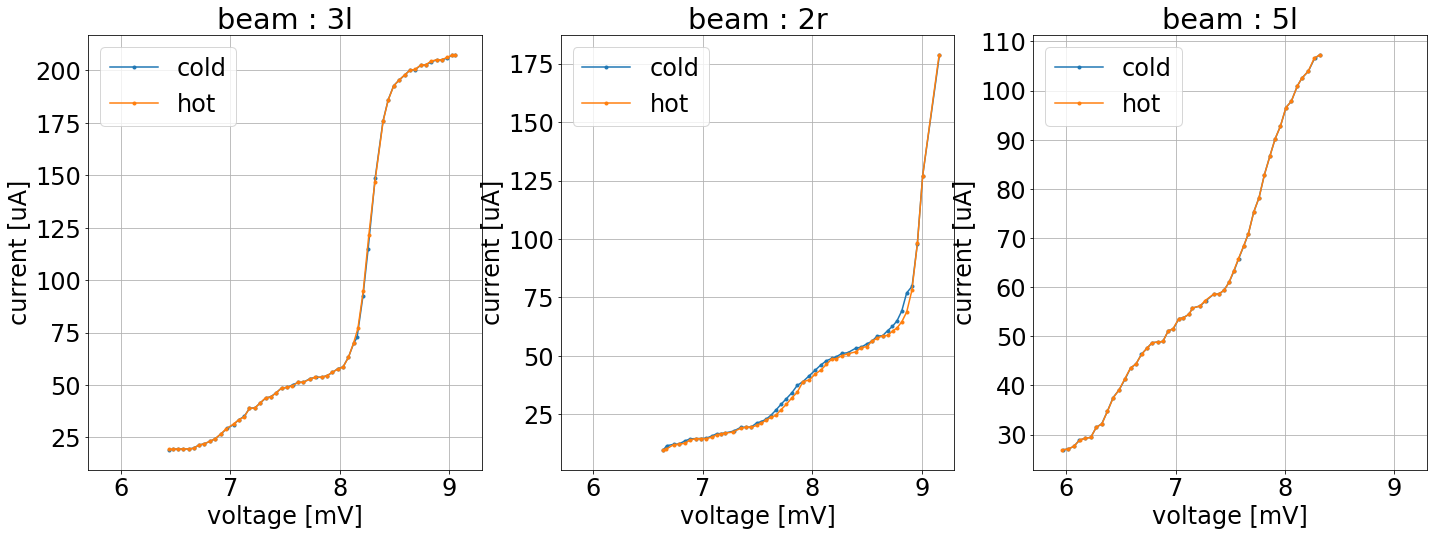

In [331]:
ncol = 3
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

# hot / cold

for _ax, _vol_hot, _cur_hot, _vol_cold, _cur_cold, _hot, _cold, _beam in zip(ax, vol_hot, cur_hot, \
                                                                                                                                       vol_cold, cur_cold, \
                                                                                                                                        power_hot, power_cold, beam):
    _ax.plot(_vol_cold, _cur_cold, '.-', label='cold')
    _ax.plot(_vol_hot, _cur_hot, '.-', label='hot')
    _ax.grid()
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_xlim(initial_voltage - 0.3, final_voltage + 0.3)
    _ax.legend()
    _ax.set_title('beam : {}'.format(_beam))    

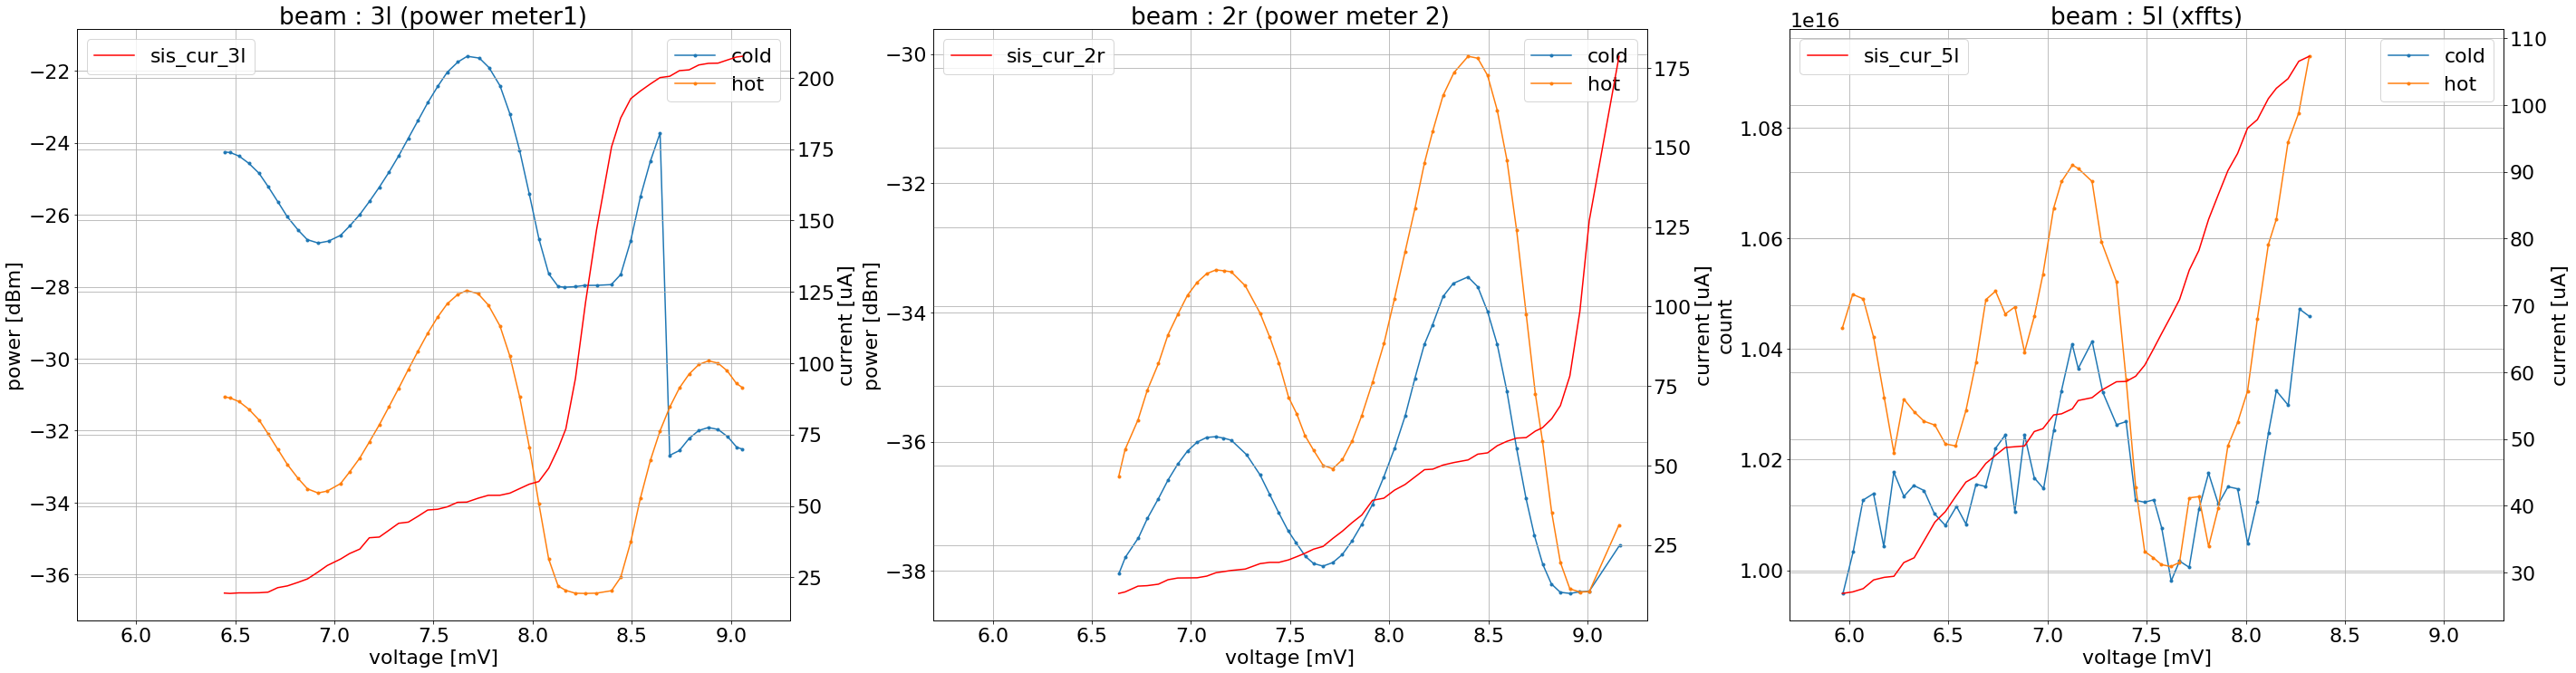

In [332]:
ncol = 3
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 200
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 10, nrow * 10)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

ax1 = [_ax.twinx() for _ax in ax]

# hot / cold

for _ax, _vol_hot, _cur_hot, _vol_cold, _cur_cold, _hot, _cold, _beam, _backend in zip(ax1, vol_hot, cur_hot, \
                                                                                                                                       vol_cold, cur_cold, \
                                                                                                                                        power_hot, power_cold, beam, backend):
    _ax.plot(_vol_hot, _cur_hot, color='red')
    _ax.grid()
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('current [uA]')
    _ax.set_xlim(initial_voltage - 0.3, final_voltage + 0.3)
    _ax.legend(loc='upper left')
    _ax.set_title('beam : {0} ({1})'.format(_beam, _backend))  
    
for _ax, _vol_hot, _cur_hot, _vol_cold, _cur_cold, _hot, _cold, _beam, _backend in zip(ax, vol_hot, cur_hot, \
                                                                                                                                                         vol_cold, cur_cold, \
                                                                                                                                                         power_hot, power_cold, beam, backend):
    _ax.plot(_vol_cold, _cold, '.-', label='cold')
    _ax.plot(_vol_hot, _hot, '.-', label='hot')
    _ax.grid()
    _ax.set_xlabel('voltage [mV]')
    _ax.set_xlim(initial_voltage - 0.3, final_voltage + 0.3)
    _ax.legend(loc='upper right')
    
ax[0].set_ylabel('power [dBm]')
ax[1].set_ylabel('power [dBm]')
ax[2].set_ylabel('count')

fig.subplots_adjust(wspace=0.4, hspace=0.4)

plt.savefig('./sisv_sweep_iv.png')

plt.show()

In [319]:
Tcold = 77
Thot = 300
y = power_hot[:2] - power_cold[:2]
y_xffts = 10 * numpy.log10(power_hot[2] / power_cold[2])
HOT = 10 ** (power_hot / 10)
COLD = 10 ** (power_cold / 10)
Y = 10 ** (y / 10)
Y_xffts = power_hot[2] / power_cold[2]
Trx = (Tcold * Y - Thot) / (1 - Y)
Trx_xffts = (Tcold * Y_xffts - Thot) / (1 - Y_xffts)

/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/home/amigos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in power
  


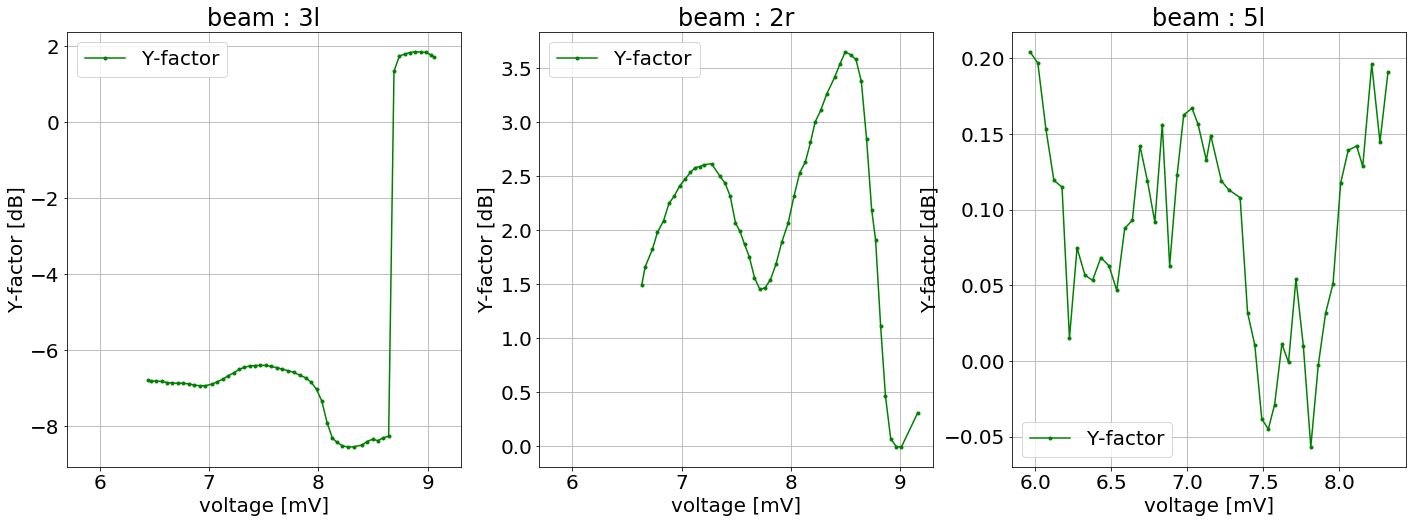

In [320]:
ncol = 3
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 50
matplotlib.rcParams['font.size'] = 20

figsize = (ncol * 8, nrow * 8)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]
# ax1 = [_ax.twinx() for _ax in ax]

for _ax, _ax1, _vol_hot, _cur_hot, _vol_cold, _cur_cold, _y, _beam in zip(ax, ax1, vol_hot, cur_hot, vol_cold, cur_cold, y, beam):
    _ax.plot(_vol_hot, _y, '.-', color='green', label='Y-factor')
#     _ax1.plot(_vol_hot, _cur_hot)
    _ax.grid()
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('Y-factor [dB]')
    _ax.set_xlim(initial_voltage - 0.3, final_voltage + 0.3)
    _ax.legend()
    _ax.set_title('beam : {}'.format(_beam))

ax[2].plot(vol_hot[2], y_xffts, '.-', color='green', label='Y-factor')
ax[2].grid()
ax[2].set_xlabel('voltage [mV]')
ax[2].set_ylabel('Y-factor [dB]')
ax[2].legend()
ax[2].set_title('beam : {}'.format(beam[2]))

plt.show()

In [321]:
# optimal

idx_minTrx = [numpy.argmin(_Trx) for _Trx in Trx ]
idx_minTrx_xffts = numpy.argmin(Trx_xffts)
minTrx = [_Trx[_idx] for _Trx, _idx in zip(Trx, idx_minTrx)]
minTrx_xffts = Trx_xffts[idx_minTrx_xffts]
optimam_voltage = [_hot_vol[_idx] for _hot_vol, _idx in zip(vol_hot, idx_minTrx)]
optimam_voltage_xffts = vol_hot[2][idx_minTrx_xffts]

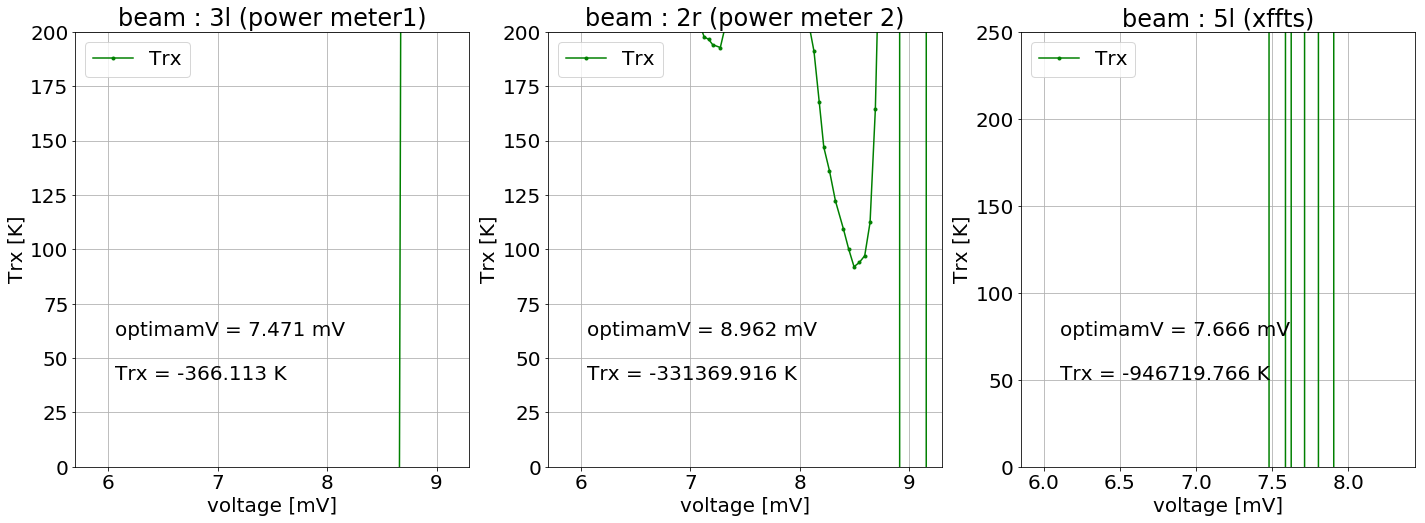

In [322]:
ncol = 3
nrow = 1
nax = ncol * nrow

matplotlib.rcParams['savefig.dpi'] = 200
matplotlib.rcParams['font.size'] = 24

figsize = (ncol * 10, nrow * 10)

fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]
# ax1 = [_ax.twinx() for _ax in ax]

for _ax, _ax1, _vol_hot, _cur_hot, _vol_cold, _cur_cold, _Trx, _beam in zip(ax, ax1, vol_hot, cur_hot, vol_cold, cur_cold, Trx, beam):
    _ax.plot(_vol_hot, _Trx, '.-', color='green', label='Trx')
#     _ax1.plot(_vol_hot, _cur_hot)
    _ax.grid()
    _ax.set_xlabel('voltage [mV]')
    _ax.set_ylabel('Trx [K]')
    _ax.set_xlim(initial_voltage - 0.3, final_voltage + 0.3)
    _ax.set_ylim(0, 200)    
    _ax.legend()
    _ax.set_title('beam : {}'.format(_beam))

ax[2].plot(vol_hot[2], Trx_xffts, '.-', color='green', label='Trx')
ax[2].grid()
ax[2].set_xlabel('voltage [mV]')
ax[2].set_ylabel('Trx [K]')
ax[2].set_ylim(0, 250)
ax[2].legend()
ax[2].set_title('beam : {}'.format(beam[2]))

[_ax.text(0.1, 0.2, 'optimamV = {0:.3f} mV\n\nTrx = {1:.3f} K'.format(_optV, mTrx), transform=_ax.transAxes) 
 for _ax, _optV, mTrx in zip(ax, optimam_voltage, minTrx)]

ax[2].text(0.1, 0.2, 'optimamV = {0:.3f} mV\n\nTrx = {1:.3f} K'
           .format(optimam_voltage_xffts, minTrx_xffts), transform=ax[2].transAxes) 

[_ax.set_title('beam : {0} ({1})'.format(_beam, _backend))
 for _ax, _beam, _backend in zip(ax, beam, backend)]

fig.subplots_adjust(wspace=0.4, hspace=0.4)

plt.savefig('./sisv_sweep.png')

plt.show()